## Experimento de selección 5 halton patches para la imagen 2+_8

In [11]:
import os
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from matplotlib import pyplot as plt

## SVM

In [34]:
images = ["1+_20", "1+_25", "2+_1","2+_8","2+_9","3+_19"]
type_im = ["1+","1+","2+","2+","2+","3+"]


In [35]:
n_seeds = 10
n_im = len(images)
f1 = np.zeros((n_im,n_seeds))
prec = np.zeros((n_im,n_seeds))
rec = np.zeros((n_im,n_seeds))
for i in range(n_im):
    path = "/home/rpezoa/experiment_data/output/" + images[i]+ "_rpr_halton_patches/"
    f = os.listdir(path)
    #print(f)
    big_target_path="/home/rpezoa/experiment_data/big_" + type_im[i] + "/labels/" + images[i] + ".npy"
    
    for j in range(n_seeds):
        big_y0=np.load(big_target_path)
        big_pred = np.load(path + 'svm/big_pred/' + str(j) + '_big_pred.npy')
        f1[i,j] = f1_score(big_y0,big_pred)
        prec[i,j] = precision_score(big_y0,big_pred)
        rec[i,j] = recall_score(big_y0,big_pred)
        #print(classification_report(big_y0,big_pred))
                

In [36]:
f1.mean(),prec.mean(),rec.mean()
print(f1)
np.save("/home/rpezoa/experiment_data/output/f1_halton_SVM.npy",f1)
np.save("/home/rpezoa/experiment_data/output/prec_halton_SVM.npy",prec)

[[ 0.36644108  0.31996979  0.27951948  0.35854828  0.32641501  0.34735286
   0.39387273  0.34503812  0.26411527  0.35026985]
 [ 0.24814241  0.24267412  0.20817674  0.20320031  0.17854598  0.2085732
   0.21465735  0.22181703  0.24159942  0.2586847 ]
 [ 0.28689287  0.28647942  0.30939442  0.32285993  0.31150861  0.31384667
   0.35301506  0.33778556  0.3027831   0.32027131]
 [ 0.38772867  0.4127526   0.4157456   0.44237762  0.42390961  0.33512975
   0.40159158  0.36485757  0.4460609   0.33376955]
 [ 0.54823228  0.54321912  0.577636    0.56135022  0.56737359  0.520274
   0.55540642  0.56834871  0.57773852  0.55055037]
 [ 0.38800728  0.39674359  0.25158693  0.33226244  0.37137645  0.35480532
   0.38542727  0.3021767   0.40911472  0.4153316 ]]


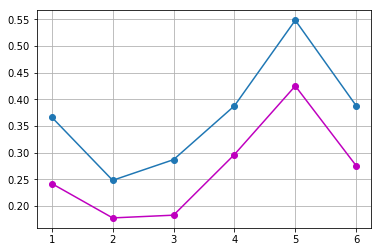

In [26]:
plt.figure()
plt.plot(range(1,7),f1[:,0],'o-')
plt.plot(range(1,7),prec[:,0],'o-m')
#plt.plot(range(1,n+1),rec,'o-y')
plt.grid()
plt.show()

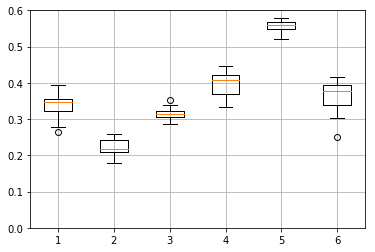

In [28]:
plt.figure()
plt.boxplot(f1.T)
#plt.boxplot(prec)
plt.grid()
plt.ylim(0,0.6)
plt.show()

## Deep Learning

In [37]:
images = ["1+_20", "1+_25", "2+_1","2+_8","2+_9","3+_19"]
type_im = ["1+","1+","2+","2+","2+","3+"]

n_seeds = 10
n_im = len(images)
f1 = np.zeros((n_im,n_seeds))
prec = np.zeros((n_im,n_seeds))
rec = np.zeros((n_im,n_seeds))
for i in range(n_im):
    path = "/home/rpezoa/experiment_data/output/" + images[i]+ "_rpr_halton_patches/"
    f = os.listdir(path)
    #print(f)
    big_target_path="/home/rpezoa/experiment_data/big_" + type_im[i] + "/labels/" + images[i] + ".npy"
    
    for j in range(n_seeds):
        big_y0=np.load(big_target_path)
        big_pred = np.load(path + 'deep/big_pred/' + str(j) + '_big_pred.npy')
        f1[i,j] = f1_score(big_y0,big_pred)
        prec[i,j] = precision_score(big_y0,big_pred)
        rec[i,j] = recall_score(big_y0,big_pred)
        #print(classification_report(big_y0,big_pred))

In [38]:
f1.mean(),prec.mean(),rec.mean()
print(f1)
np.save("/home/rpezoa/experiment_data/output/f1_halton_Deep.npy",f1)
np.save("/home/rpezoa/experiment_data/output/prec_halton_Deep.npy",prec)

[[ 0.36364249  0.38605867  0.31883898  0.37239776  0.41588498  0.38992289
   0.41549455  0.36564381  0.29841197  0.40237627]
 [ 0.23448314  0.23676454  0.22010364  0.22614309  0.23630434  0.24958954
   0.242135    0.23305333  0.28290505  0.27864563]
 [ 0.27062721  0.26637966  0.34109069  0.32669935  0.27957094  0.32683095
   0.32380337  0.3271533   0.29986859  0.29646966]
 [ 0.39296996  0.44754297  0.45245399  0.45379321  0.41237013  0.40241065
   0.4133268   0.41649892  0.45070858  0.42495307]
 [ 0.60762351  0.55343712  0.60658225  0.56405512  0.53213842  0.55983927
   0.56087079  0.57798311  0.60018646  0.57294392]
 [ 0.25686093  0.40031286  0.06204743  0.34825848  0.23034421  0.3061918
   0.39174886  0.28057885  0.42921049  0.41282335]]


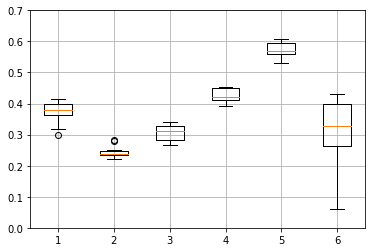

In [40]:
plt.figure()
plt.boxplot(f1.T)
#plt.boxplot(prec)
plt.grid()
plt.ylim(0,0.7)
plt.show()

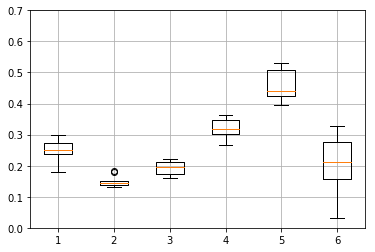

In [41]:
plt.figure()
plt.boxplot(prec.T)
#plt.boxplot(prec)
plt.grid()
plt.ylim(0,0.7)
plt.show()

## Random Forest

[[ 0.39155     0.33189239  0.31025611  0.37415754  0.40933398  0.34443663
   0.42689892  0.38233546  0.31678953  0.38399517]
 [ 0.27584455  0.26833669  0.24991456  0.22489585  0.21061641  0.25859224
   0.24321513  0.24631879  0.27667819  0.25805071]
 [ 0.28180397  0.29777514  0.33456058  0.34693544  0.31326607  0.33123161
   0.30072344  0.33666925  0.31863453  0.31481084]
 [ 0.4153228   0.43348572  0.43633119  0.4453562   0.42779024  0.35178959
   0.41677802  0.41813565  0.4297272   0.40688602]
 [ 0.57594909  0.54303052  0.5889825   0.57567469  0.52768943  0.52158112
   0.58049404  0.58356631  0.5765541   0.55679244]
 [ 0.42222287  0.3905697   0.39265976  0.36408341  0.34556898  0.33234047
   0.40498504  0.32489846  0.41319871  0.41242551]]


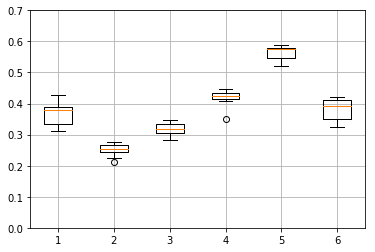

In [42]:
images = ["1+_20", "1+_25", "2+_1","2+_8","2+_9","3+_19"]
type_im = ["1+","1+","2+","2+","2+","3+"]

n_seeds = 10
n_im = len(images)
f1 = np.zeros((n_im,n_seeds))
prec = np.zeros((n_im,n_seeds))
rec = np.zeros((n_im,n_seeds))
for i in range(n_im):
    path = "/home/rpezoa/experiment_data/output/" + images[i]+ "_rpr_halton_patches/"
    f = os.listdir(path)
    #print(f)
    big_target_path="/home/rpezoa/experiment_data/big_" + type_im[i] + "/labels/" + images[i] + ".npy"
    
    for j in range(n_seeds):
        big_y0=np.load(big_target_path)
        big_pred = np.load(path + 'rf/big_pred/' + str(j) + '_big_pred.npy')
        f1[i,j] = f1_score(big_y0,big_pred)
        prec[i,j] = precision_score(big_y0,big_pred)
        rec[i,j] = recall_score(big_y0,big_pred)
        #print(classification_report(big_y0,big_pred))
        
f1.mean(),prec.mean(),rec.mean()
print(f1)
np.save("/home/rpezoa/experiment_data/output/f1_halton_rf.npy",f1)
np.save("/home/rpezoa/experiment_data/output/prec_halton_rf.npy",prec)

plt.figure()
plt.boxplot(f1.T)
#plt.boxplot(prec)
plt.grid()
plt.ylim(0,0.7)
plt.show()

## KNN

[[ 0.34087626  0.27871359  0.22961485  0.33987319  0.36386697  0.32170363
   0.39823136  0.35422875  0.2779432   0.32837156]
 [ 0.24662977  0.2332466   0.21680704  0.18154918  0.19238001  0.21858673
   0.21898567  0.19696432  0.24292413  0.25106856]
 [ 0.2646629   0.27199622  0.3128952   0.29680468  0.28280488  0.28046119
   0.26807016  0.31028032  0.29071204  0.2781378 ]
 [ 0.39849221  0.388937    0.39092889  0.40632896  0.38851507  0.31029671
   0.39021265  0.379512    0.39349234  0.30239743]
 [ 0.55861603  0.51922722  0.57649487  0.54191287  0.51558412  0.50007491
   0.55758859  0.55313068  0.5708075   0.53386982]
 [ 0.40543107  0.39481048  0.36239396  0.33927588  0.32123422  0.34506054
   0.38264615  0.31263492  0.39927777  0.41214637]]


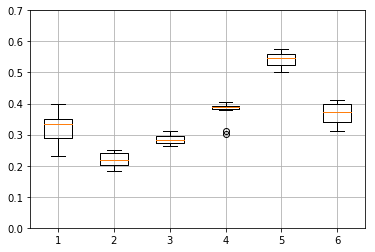

In [43]:
images = ["1+_20", "1+_25", "2+_1","2+_8","2+_9","3+_19"]
type_im = ["1+","1+","2+","2+","2+","3+"]

n_seeds = 10
n_im = len(images)
f1 = np.zeros((n_im,n_seeds))
prec = np.zeros((n_im,n_seeds))
rec = np.zeros((n_im,n_seeds))
for i in range(n_im):
    path = "/home/rpezoa/experiment_data/output/" + images[i]+ "_rpr_halton_patches/"
    f = os.listdir(path)
    #print(f)
    big_target_path="/home/rpezoa/experiment_data/big_" + type_im[i] + "/labels/" + images[i] + ".npy"
    
    for j in range(n_seeds):
        big_y0=np.load(big_target_path)
        big_pred = np.load(path + 'knn/big_pred/' + str(j) + '_big_pred.npy')
        f1[i,j] = f1_score(big_y0,big_pred)
        prec[i,j] = precision_score(big_y0,big_pred)
        rec[i,j] = recall_score(big_y0,big_pred)
        #print(classification_report(big_y0,big_pred))
        
f1.mean(),prec.mean(),rec.mean()
print(f1)
np.save("/home/rpezoa/experiment_data/output/f1_halton_knn.npy",f1)
np.save("/home/rpezoa/experiment_data/output/prec_halton_knn.npy",prec)

plt.figure()
plt.boxplot(f1.T)
#plt.boxplot(prec)
plt.grid()
plt.ylim(0,0.7)
plt.show()

## Extra Trees

In [ ]:
images = ["1+_20", "1+_25", "2+_1","2+_8","2+_9","3+_19"]
type_im = ["1+","1+","2+","2+","2+","3+"]

n_seeds = 10
n_im = len(images)
f1 = np.zeros((n_im,n_seeds))
prec = np.zeros((n_im,n_seeds))
rec = np.zeros((n_im,n_seeds))
for i in range(n_im):
    path = "/home/rpezoa/experiment_data/output/" + images[i]+ "_rpr_halton_patches/"
    f = os.listdir(path)
    #print(f)
    big_target_path="/home/rpezoa/experiment_data/big_" + type_im[i] + "/labels/" + images[i] + ".npy"
    
    for j in range(n_seeds):
        big_y0=np.load(big_target_path)
        big_pred = np.load(path + 'knn/big_pred/' + str(j) + '_big_pred.npy')
        f1[i,j] = f1_score(big_y0,big_pred)
        prec[i,j] = precision_score(big_y0,big_pred)
        rec[i,j] = recall_score(big_y0,big_pred)
        #print(classification_report(big_y0,big_pred))
        
f1.mean(),prec.mean(),rec.mean()
print(f1)
np.save("/home/rpezoa/experiment_data/output/f1_halton_knn.npy",f1)
np.save("/home/rpezoa/experiment_data/output/prec_halton_knn.npy",prec)

plt.figure()
plt.boxplot(f1.T)
#plt.boxplot(prec)
plt.grid()
plt.ylim(0,0.7)
plt.show()